In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
dir = '/content/SMG'
class_names = ['A_TXT', 'N_TXT']
class_var = []
channel_val = []

for folder_name in os.listdir(dir):
    folder_path = os.path.join(dir, folder_name)
    if os.path.isdir(folder_path) and folder_name in class_names:
        for file_name in os.listdir(folder_path):
            i = 0
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, "r") as file:
                for _ in range(7):
                    next(file)
                for line in file:
                    i = i+1
                    if not line.strip():
                        continue
                    h = line.strip()
                    values = line.split()[:5]
                    if len(values) < 5:
                        continue
                    values = [float(value) for value in values]
                    channel_val.append(values)
                    name = folder_name
                    index = class_names.index(name)
                    class_var.append(index)
channel_val = np.array(channel_val)
class_var = np.array(class_var)

x_train = channel_val[:, :4]
y_train = class_var[:]
y_train = to_categorical(y_train)

In [3]:
x_train.shape

(1325045, 4)

In [5]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [4]:
y_train.shape

(1325045, 2)

In [6]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# scaling train data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
x_train

array([[ 1.42084053,  0.09909451, -0.00522282,  0.03434944],
       [ 0.0928643 , -0.12302692, -0.16630554, -0.16116971],
       [ 0.4491506 ,  0.14293426,  0.46575235,  0.14731605],
       ...,
       [ 4.7512601 , -2.05197618,  0.21262237, -0.69993357],
       [ 0.03570607,  0.25107233, -0.01749579, -0.08078962],
       [ 0.07762211, -0.12302692, -0.32738825, -0.03082361]])

Epoch 1/50
57/57 [==============================] - 2s 15ms/step - loss: 0.6505 - accuracy: 0.6408 - val_loss: 0.6374 - val_accuracy: 0.6431
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6361 - accuracy: 0.6416 - val_loss: 0.6319 - val_accuracy: 0.6431
Epoch 3/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6329 - accuracy: 0.6416 - val_loss: 0.6303 - val_accuracy: 0.6431
Epoch 4/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6313 - accuracy: 0.6415 - val_loss: 0.6289 - val_accuracy: 0.6431
Epoch 5/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6298 - accuracy: 0.6415 - val_loss: 0.6274 - val_accuracy: 0.6431
Epoch 6/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6283 - accuracy: 0.6416 - val_loss: 0.6258 - val_accuracy: 0.6431
Epoch 7/50
57/57 [==============================] - 1s 11ms/step - loss: 0.6266 - accuracy: 0.6416 - val_loss: 0.6243 - val_accuracy: 0.6431
Epoch 8/50
57

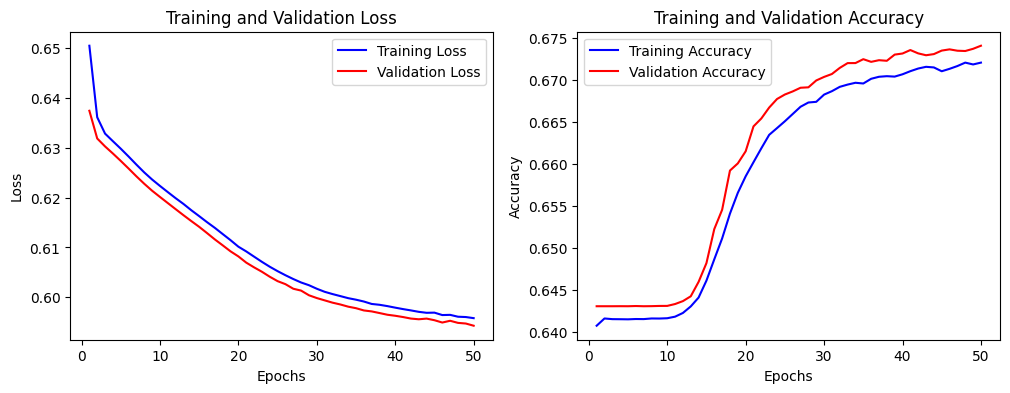

In [15]:
# Build the MLP model
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(256, activation='tanh'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=20000,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Save the model
model.save('model_q6_a1.h5')
model.summary()

# Report accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Report loss and accuracy during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/100
29/29 [==============================] - 2s 28ms/step - loss: 3.1822 - accuracy: 0.6097 - val_loss: 1.2518 - val_accuracy: 0.6092
Epoch 2/100
29/29 [==============================] - 1s 19ms/step - loss: 1.2660 - accuracy: 0.5525 - val_loss: 1.1806 - val_accuracy: 0.6069
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 1.1853 - accuracy: 0.5993 - val_loss: 1.0994 - val_accuracy: 0.6431
Epoch 4/100
29/29 [==============================] - 1s 19ms/step - loss: 1.1303 - accuracy: 0.6249 - val_loss: 1.0582 - val_accuracy: 0.6431
Epoch 5/100
29/29 [==============================] - 1s 21ms/step - loss: 1.0856 - accuracy: 0.6299 - val_loss: 1.0193 - val_accuracy: 0.6431
Epoch 6/100
29/29 [==============================] - 1s 20ms/step - loss: 1.0465 - accuracy: 0.6328 - val_loss: 0.9788 - val_accuracy: 0.6431
Epoch 7/100
29/29 [==============================] - 1s 19ms/step - loss: 1.0076 - accuracy: 0.6369 - val_loss: 0.9351 - val_accuracy: 0.6431
Epoch 

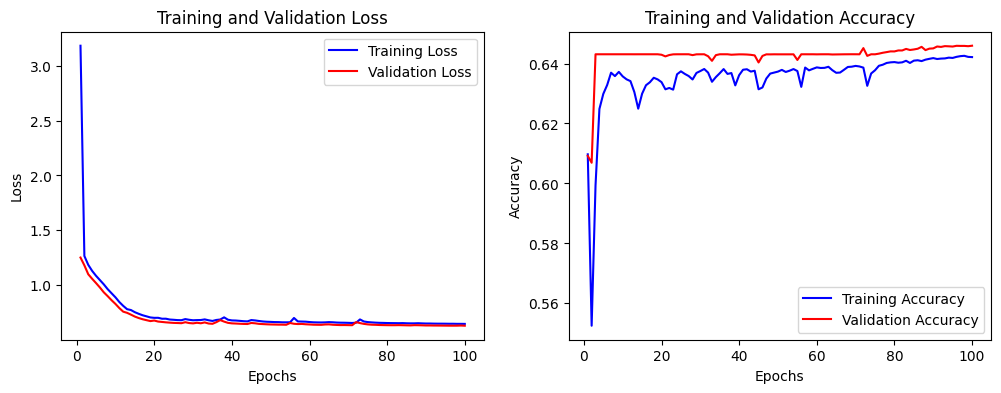

In [16]:
# Build the MLP model
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2)
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=40000,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Save the model
model.save('model_q6_a2.h5')
model.summary()

# Report accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Report loss and accuracy during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/100
29/29 [==============================] - 3s 40ms/step - loss: 2.5613 - accuracy: 0.6112 - val_loss: 1.2679 - val_accuracy: 0.6322
Epoch 2/100
29/29 [==============================] - 1s 32ms/step - loss: 1.2931 - accuracy: 0.5742 - val_loss: 1.1956 - val_accuracy: 0.6275
Epoch 3/100
29/29 [==============================] - 1s 32ms/step - loss: 1.2195 - accuracy: 0.5928 - val_loss: 1.1478 - val_accuracy: 0.6412
Epoch 4/100
29/29 [==============================] - 1s 32ms/step - loss: 1.1689 - accuracy: 0.6107 - val_loss: 1.0921 - val_accuracy: 0.6431
Epoch 5/100
29/29 [==============================] - 1s 35ms/step - loss: 1.1164 - accuracy: 0.6279 - val_loss: 1.0444 - val_accuracy: 0.6431
Epoch 6/100
29/29 [==============================] - 1s 32ms/step - loss: 1.0739 - accuracy: 0.6328 - val_loss: 1.0044 - val_accuracy: 0.6431
Epoch 7/100
29/29 [==============================] - 1s 32ms/step - loss: 1.0312 - accuracy: 0.6359 - val_loss: 0.9663 - val_accuracy: 0.6431
Epoch 

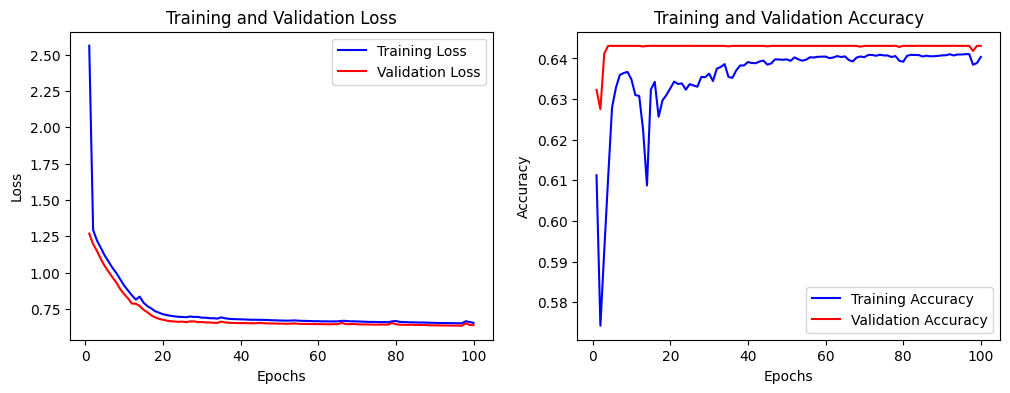

In [17]:
from tensorflow.keras.layers import PReLU

model = models.Sequential([
    layers.Dense(256, input_shape=(x_train.shape[1],)),
    PReLU(),
    layers.Dense(256),
    PReLU(),
    layers.Dense(256),
    PReLU(),
    layers.Dropout(0.5),
    layers.Dense(2)
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build the MLP model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=40000,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Save model
model.save('model_q6_a3.h5')
model.summary()

# Report accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Report loss and accuracy during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/70
29/29 [==============================] - 2s 29ms/step - loss: 3.2699 - accuracy: 0.5214 - val_loss: 1.8618 - val_accuracy: 0.5594
Epoch 2/70
29/29 [==============================] - 1s 21ms/step - loss: 2.0746 - accuracy: 0.5450 - val_loss: 1.3681 - val_accuracy: 0.5697
Epoch 3/70
29/29 [==============================] - 1s 20ms/step - loss: 1.6028 - accuracy: 0.5514 - val_loss: 0.9839 - val_accuracy: 0.6093
Epoch 4/70
29/29 [==============================] - 1s 20ms/step - loss: 1.3019 - accuracy: 0.5627 - val_loss: 0.8651 - val_accuracy: 0.6352
Epoch 5/70
29/29 [==============================] - 1s 20ms/step - loss: 1.2662 - accuracy: 0.5744 - val_loss: 0.8787 - val_accuracy: 0.6181
Epoch 6/70
29/29 [==============================] - 1s 20ms/step - loss: 1.0655 - accuracy: 0.5838 - val_loss: 0.7537 - val_accuracy: 0.6423
Epoch 7/70
29/29 [==============================] - 1s 22ms/step - loss: 0.9733 - accuracy: 0.5896 - val_loss: 0.9109 - val_accuracy: 0.6174
Epoch 8/70
29

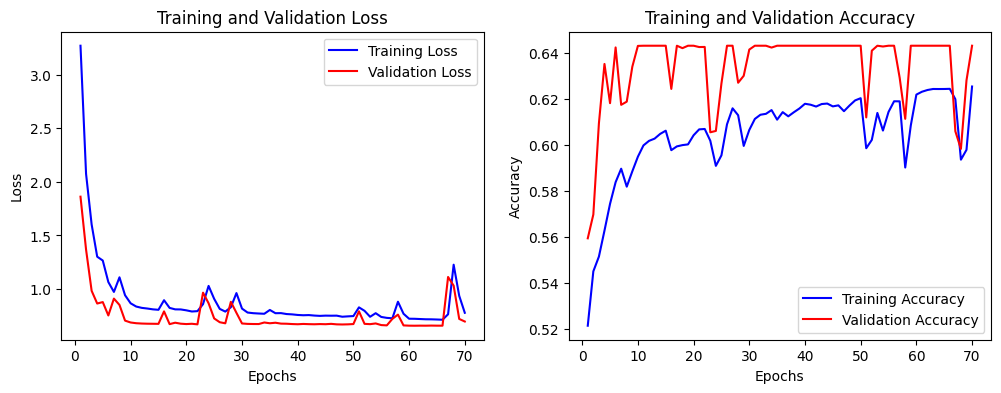

In [14]:
from tensorflow.keras.layers import Activation


model = models.Sequential([
    layers.Dense(256, input_shape=(x_train.shape[1],)),
    Activation('elu'),
    layers.Dense(256),
    Activation('elu'),
    layers.Dense(256),
    Activation('elu'),
    layers.Dropout(0.5),
    layers.Dense(2)
])


model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Build the MLP model
history = model.fit(x_train, y_train,
                    epochs=70,
                    batch_size=40000,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Save model
model.save('model_q6_a4.h5')
model.summary()

# Report accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Report loss and accuracy during training
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


By comparing the use of each of the three functions as activation functions, we observe that none of them achieve an accuracy higher than 70 percent, which could be attributed to the network's lack of depth and weak data. Among the activation functions, we also see that the network using the elu function has very unstable accuracy and has lower accuracy compared to the other two networks. Additionally, the accuracies of prelu and relu are almost similar.